In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_set=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\yeast.csv")
data_set

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [5]:
data_set.isna().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


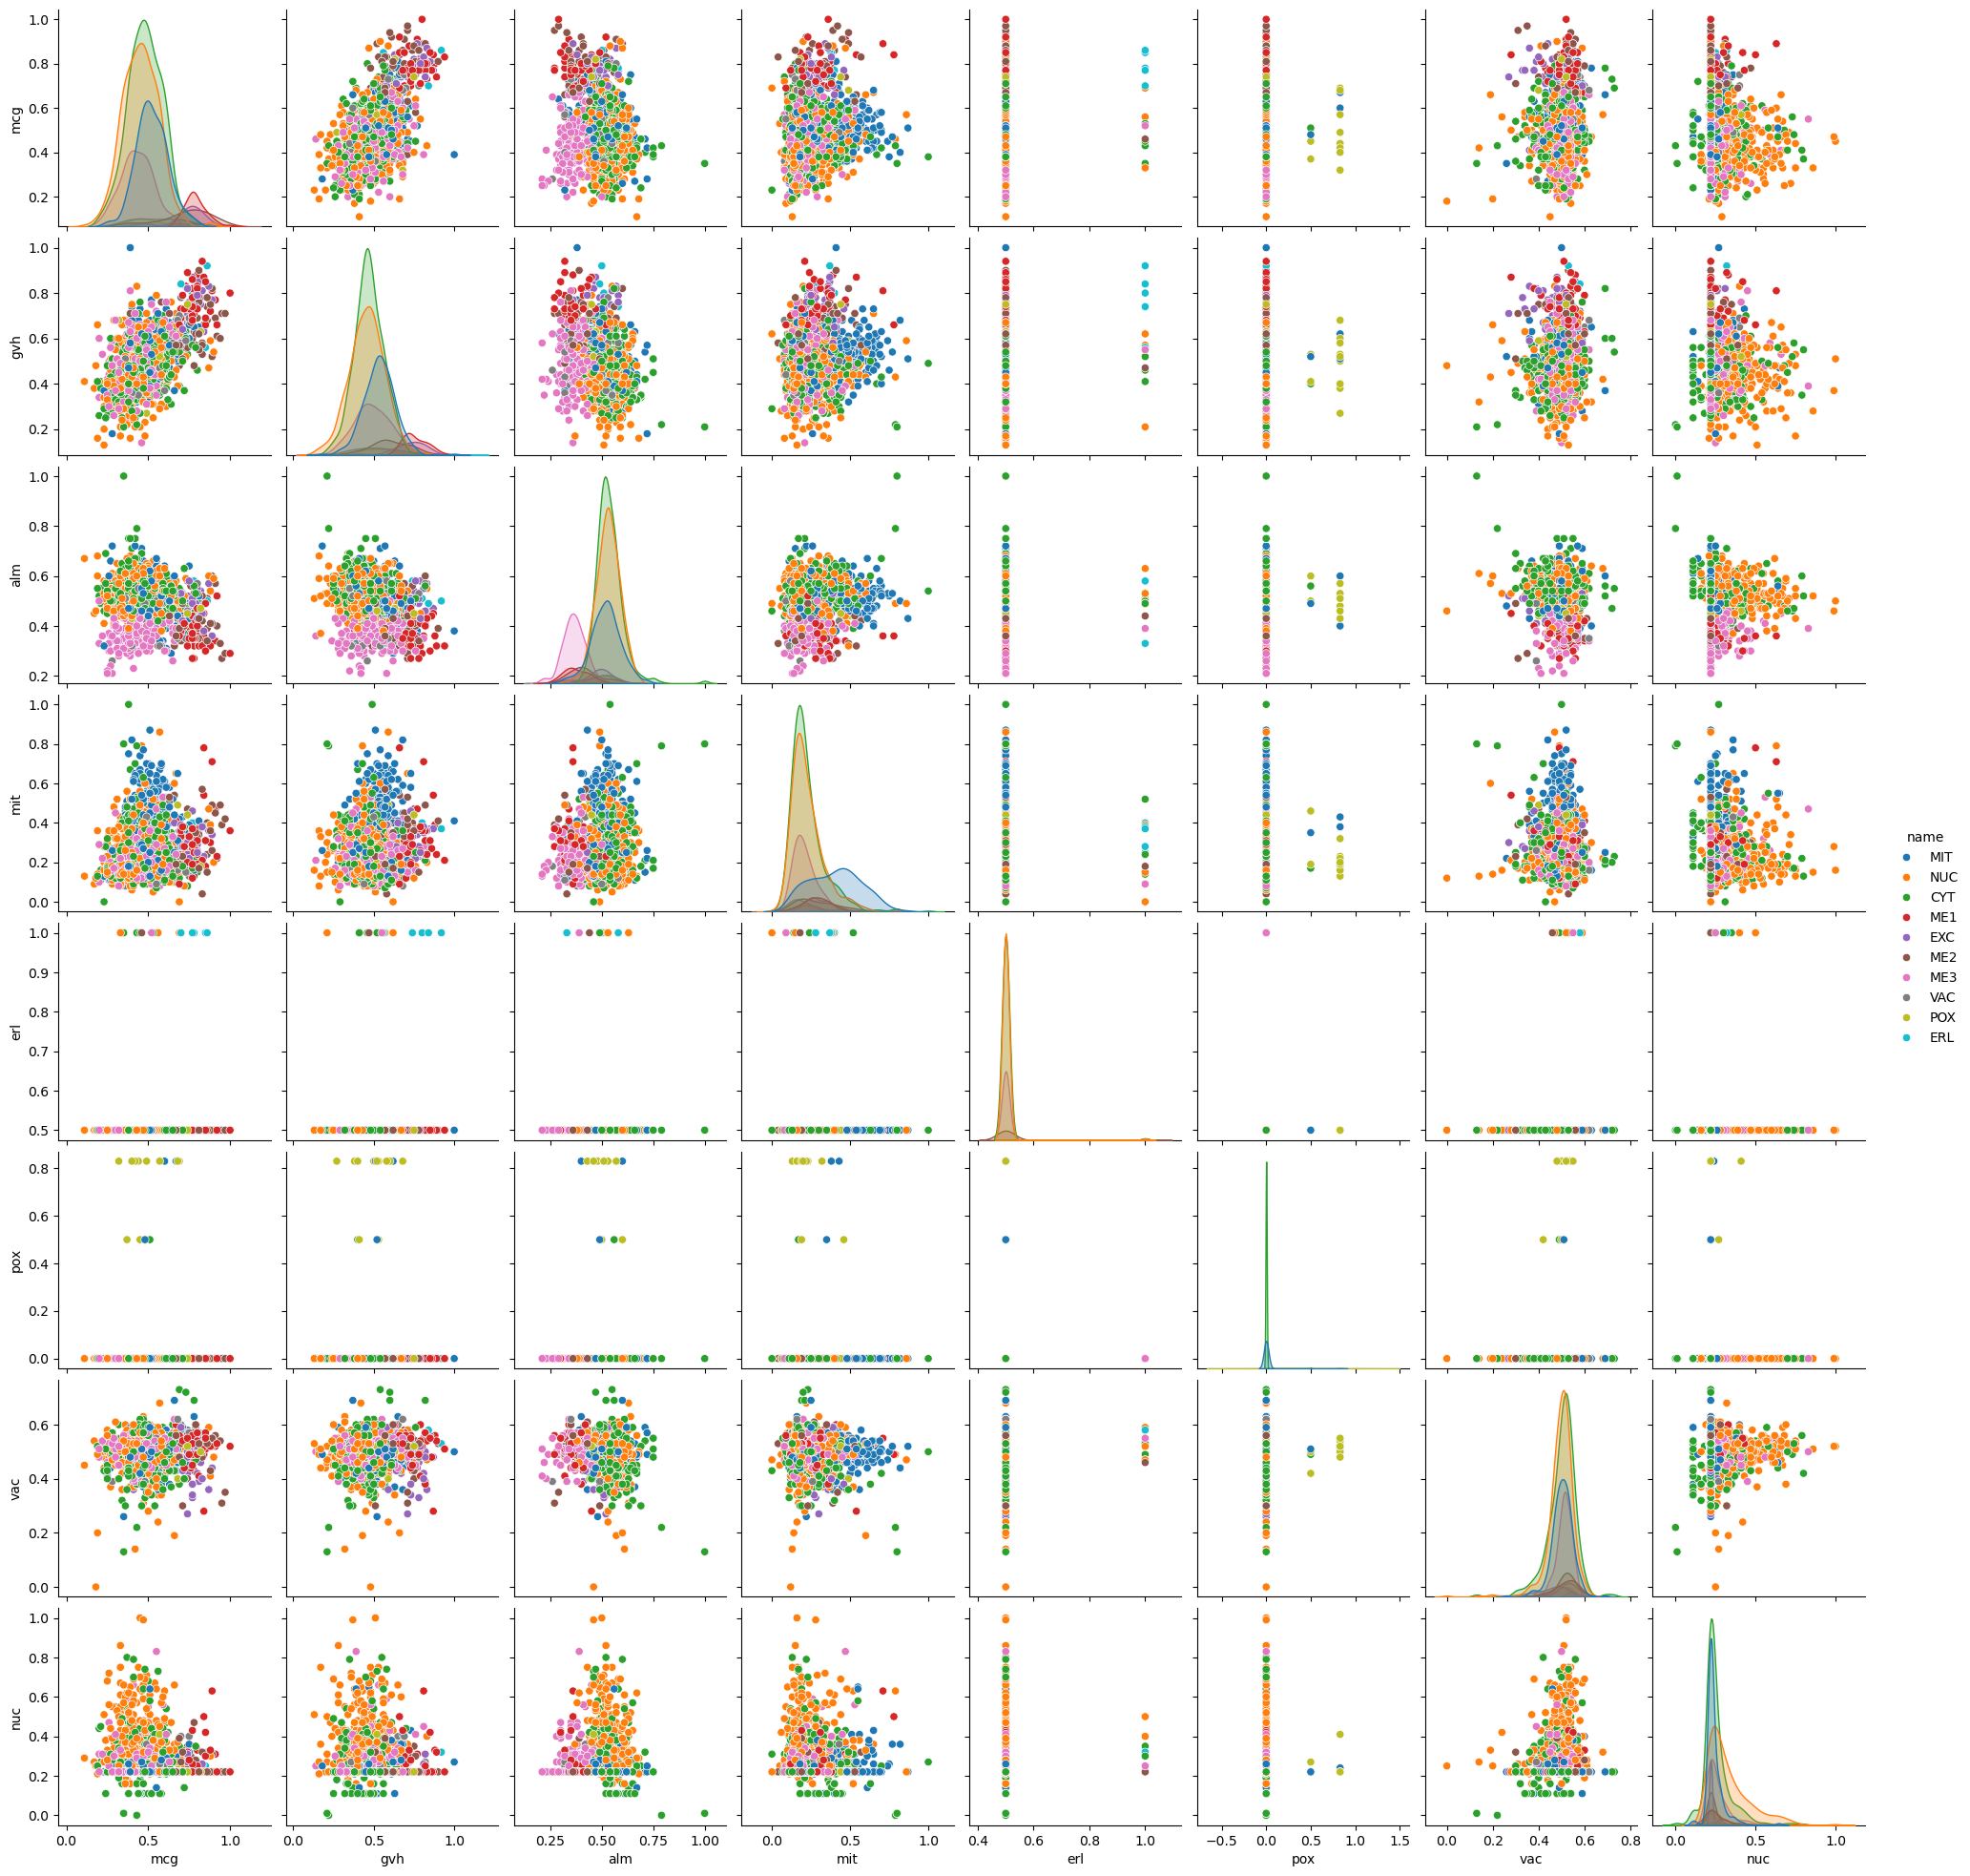

In [7]:
sns.pairplot(data_set,hue="name")

In [8]:
from sklearn.preprocessing import LabelEncoder
name_encoder=LabelEncoder()
data_set["name"]=name_encoder.fit_transform(data_set["name"].values)

In [10]:
data_set.head(10)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,6
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,7
8,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,6
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0


In [11]:
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(max_iter=200)
log_classifier.fit(x_train,y_train)

LogisticRegression(max_iter=200)

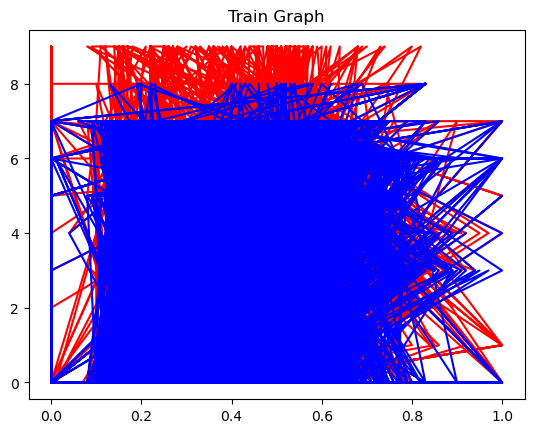

In [14]:
plt.plot(x_train,y_train,"r")
plt.plot(x_train,log_classifier.predict(x_train),"b")
plt.title("Train Graph")
plt.show()

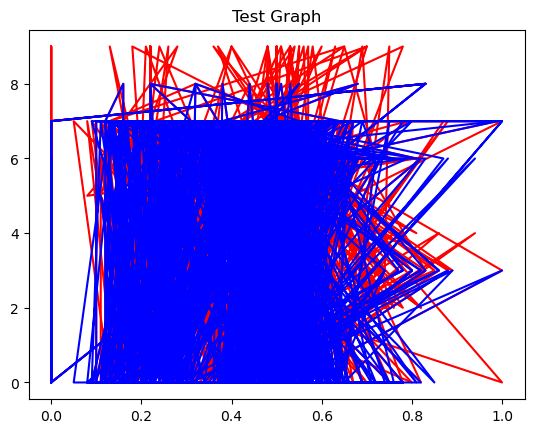

In [15]:
plt.plot(x_test,y_test,"r")
plt.plot(x_test,log_classifier.predict(x_test),"b")
plt.title("Test Graph")
plt.show()

In [16]:
print("Train Score:",log_classifier.score(x_train,y_train))
print("Test Score:",log_classifier.score(x_test,y_test))

Train Score: 0.556866048862679
Test Score: 0.5858585858585859


In [17]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(x_train,y_train)

SVC(random_state=42)

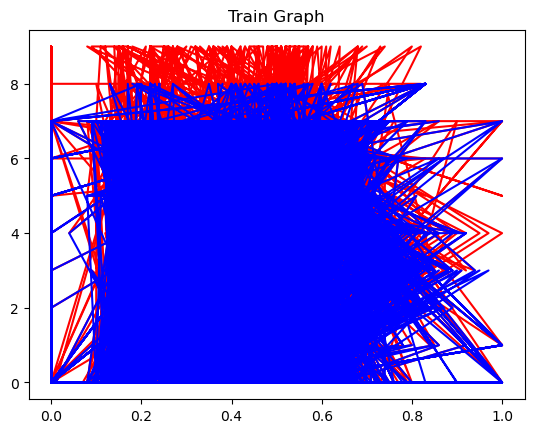

In [18]:
plt.plot(x_train,y_train,"r")
plt.plot(x_train,svc_classifier.predict(x_train),"b")
plt.title("Train Graph")
plt.show()

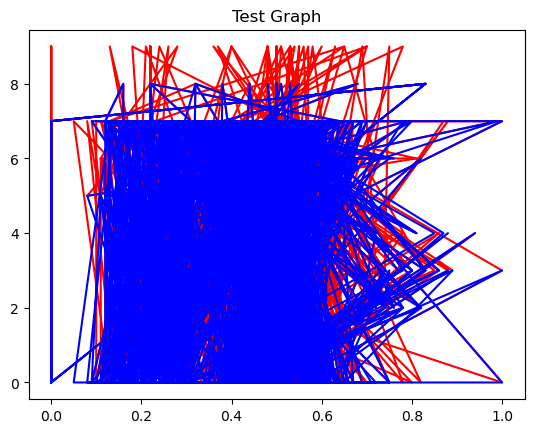

In [19]:
plt.plot(x_test,y_test,"r")
plt.plot(x_test,svc_classifier.predict(x_test),"b")
plt.title("Test Graph")
plt.show()

In [20]:
print("Train Score:",svc_classifier.score(x_train,y_train))
print("Test Score:",svc_classifier.score(x_test,y_test))

Train Score: 0.6234203875315922
Test Score: 0.6127946127946128


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(metric="minkowski",p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

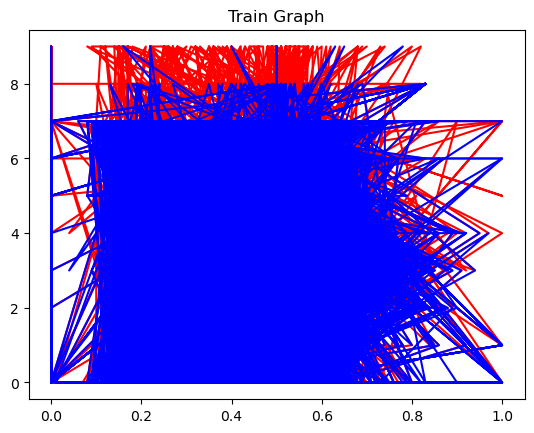

In [22]:
plt.plot(x_train,y_train,"r")
plt.plot(x_train,knn_classifier.predict(x_train),"b")
plt.title("Train Graph")
plt.show()

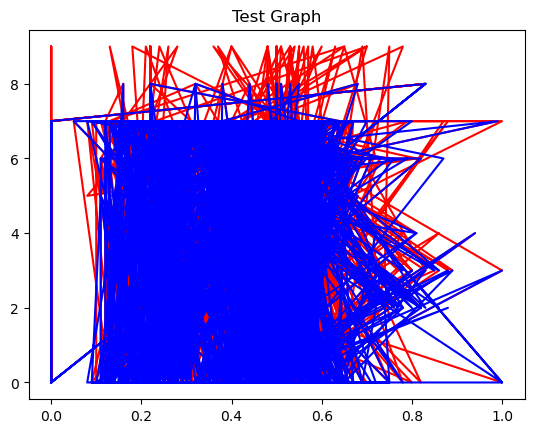

In [23]:
plt.plot(x_test,y_test,"r")
plt.plot(x_test,knn_classifier.predict(x_test),"b")
plt.title("Test Graph")
plt.show()

In [24]:
print("Train Score:",knn_classifier.score(x_train,y_train))
print("Test Score:",knn_classifier.score(x_test,y_test))

Train Score: 0.6807076663858467
Test Score: 0.5824915824915825


In [25]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)

GaussianNB()

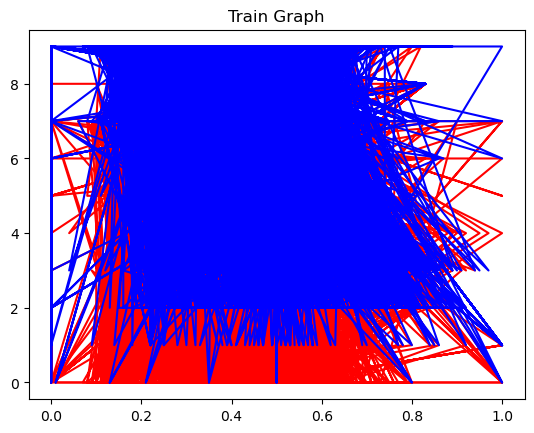

In [26]:
plt.plot(x_train,y_train,"r")
plt.plot(x_train,bayes_classifier.predict(x_train),"b")
plt.title("Train Graph")
plt.show()

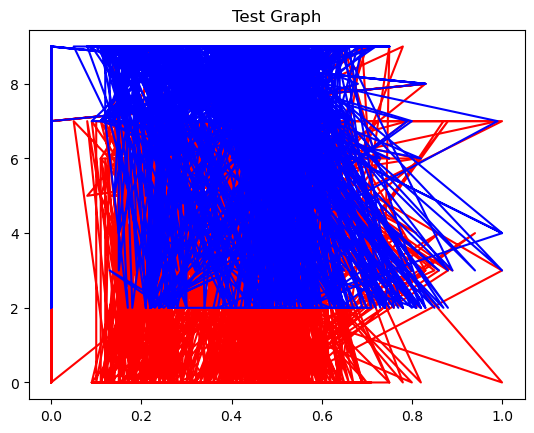

In [27]:
plt.plot(x_test,y_test,"r")
plt.plot(x_test,bayes_classifier.predict(x_test),"b")
plt.title("Test Graph")
plt.show()

In [28]:
print("Train Score:",bayes_classifier.score(x_train,y_train))
print("Test Score:",bayes_classifier.score(x_test,y_test))

Train Score: 0.1971356360572873
Test Score: 0.1750841750841751


In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

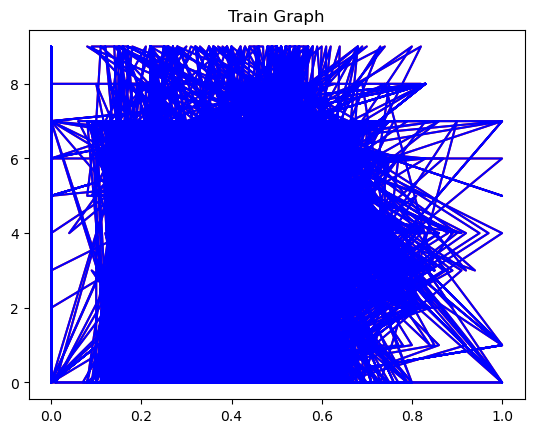

In [30]:
plt.plot(x_train,y_train,"r")
plt.plot(x_train,tree_classifier.predict(x_train),"b")
plt.title("Train Graph")
plt.show()

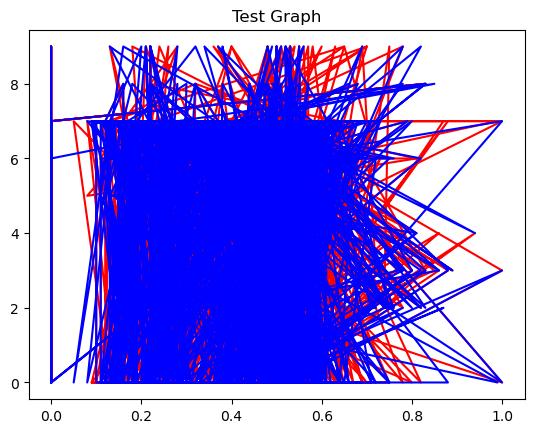

In [31]:
plt.plot(x_test,y_test,"r")
plt.plot(x_test,tree_classifier.predict(x_test),"b")
plt.title("Test Graph")
plt.show()

In [32]:
print("Train Score:",tree_classifier.score(x_train,y_train))
print("Test Score:",tree_classifier.score(x_test,y_test))

Train Score: 1.0
Test Score: 0.4713804713804714


In [33]:
models=["Logistic Regression Train","Logistic Regression Test","SVC Train","SVC Test","KNN Train","KNN Test","Naive Bayes Train","Naive Bayes Test","Decision Tree Train","Decision Tree Test"]
scores=[log_classifier.score(x_train,y_train),log_classifier.score(x_test,y_test),svc_classifier.score(x_train,y_train),svc_classifier.score(x_test,y_test),knn_classifier.score(x_train,y_train),knn_classifier.score(x_test,y_test),bayes_classifier.score(x_train,y_train),bayes_classifier.score(x_test,y_test),tree_classifier.score(x_train,y_train),tree_classifier.score(x_test,y_test)]

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=scores,y=models)
plt.xlabel("Scores")
plt.ylabel("Models")
plt.title("Models Vs Score")
plt.show()